# Analyzing Hotel Booking Cancellations

## Business Context

As a Data Analyst of a company owning a city hotel in a metropolitan area and a resort hotel located near a coastline both within the United States, you've been assigned by your manager to provide insights on the recent rise of hotel booking cancellations in both hotels for the past few months. These events causes the management to suffer financial losses and they would like to know some leads on reasons why customers cancel their room reservations.

## Importing Python Libraries

For us to analyze the given data, we first have to import the necessary Python libraries.

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


data = pd.read_csv("/content/drive/MyDrive/hotel_bookings_data.csv")

In [ ]:
# Run the given cell
data.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
0,Resort Hotel,342,2015,July,1,2,0.0,0,BB,PRT,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,737,2015,July,1,2,0.0,0,BB,PRT,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,7,2015,July,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,13,2015,July,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
# Run the given cell
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

## Data Cleaning


#### Remove duplicated rows



In [ ]:
# Run the given cell
data[data.duplicated()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
5,Resort Hotel,14,2015,July,1,2,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,72,2015,July,1,2,0.0,0,BB,PRT,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,70,2015,July,2,2,0.0,0,HB,ROU,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,5,2015,July,5,2,0.0,0,BB,PRT,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,2015,July,7,1,0.0,0,BB,GBR,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,186,2017,August,31,2,0.0,0,BB,DEU,...,D,0,No Deposit,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,63,2017,August,31,3,0.0,0,BB,SWE,...,D,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [ ]:
# Enter your code here
data = data.drop_duplicates()

In [ ]:
# Run the given cell

print(data.shape)

(87300, 24)


#### Check Columns containing Missing Values

In [ ]:
num_missing_cols = data.isna().sum().sort_values(ascending = False)


In [ ]:
print(num_missing_cols)

country                           451
children                            4
hotel                               0
reserved_room_type                  0
status                              0
special_requests                    0
car_parking_spaces                  0
adr                                 0
customer_type                       0
days_in_waiting_list                0
deposit_type                        0
booking_changes                     0
assigned_room_type                  0
previous_bookings_not_canceled      0
lead_time                           0
previous_cancellations              0
is_repeated_guest                   0
meal                                0
babies                              0
adults                              0
arrival_date_day_of_month           0
arrival_date_month                  0
arrival_date_year                   0
status_last_update                  0
dtype: int64


#### Clean the `country` and `children` column by providing a default value

When we look at the `country` and `children` columns further:

In [ ]:
data[data['country'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
30,Resort Hotel,118,2015,July,1,1,0.0,0,BB,NaN,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,7/15/2015
4127,Resort Hotel,0,2016,February,15,0,0.0,0,SC,NaN,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2/15/2016
7092,Resort Hotel,8,2016,July,21,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,7/20/2016
7860,Resort Hotel,39,2016,August,30,2,0.0,0,HB,NaN,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,7/22/2016
8779,Resort Hotel,0,2016,October,13,1,0.0,0,BB,NaN,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,10/13/2016


In [ ]:
data[data['children'].isna()].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
40600,City Hotel,2,2015,August,3,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,2015,August,5,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,2015,August,5,3,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,8,2015,August,13,2,NaN,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


In [ ]:
data['country'] = data['country'].fillna('Other')

In [ ]:
data[data['country'] == 'Other'].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
30,Resort Hotel,118,2015,July,1,1,0.0,0,BB,Other,...,A,2,No Deposit,0,Transient,62.0,0,2,Check-Out,7/15/2015
4127,Resort Hotel,0,2016,February,15,0,0.0,0,SC,Other,...,P,0,No Deposit,0,Transient,0.0,0,0,Canceled,2/15/2016
7092,Resort Hotel,8,2016,July,21,1,0.0,0,BB,Other,...,A,0,No Deposit,0,Transient,73.0,0,2,Canceled,7/20/2016
7860,Resort Hotel,39,2016,August,30,2,0.0,0,HB,Other,...,A,0,No Deposit,0,Transient,159.0,0,5,Canceled,7/22/2016
8779,Resort Hotel,0,2016,October,13,1,0.0,0,BB,Other,...,A,0,No Deposit,0,Transient,50.0,0,0,Canceled,10/13/2016


In [ ]:
data['children'].fillna('0', inplace = True)
# data['children'] = data['children'].fillna('0')

In [ ]:
data[data['children'] == '0'].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,car_parking_spaces,special_requests,status,status_last_update
40600,City Hotel,2,2015,August,3,2,0,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/1/2015
40667,City Hotel,1,2015,August,5,2,0,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,12.0,0,1,Canceled,8/4/2015
40679,City Hotel,1,2015,August,5,3,0,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,18.0,0,2,Canceled,8/4/2015
41160,City Hotel,8,2015,August,13,2,0,0,BB,PRT,...,B,0,No Deposit,0,Transient-Party,76.5,0,1,Canceled,8/9/2015


For us to verify our progress, we'll going to initially check them using `assert` statement. If the following cell yields an error, we might have to check our code again to have the correct answer. Otherwise, our code would be correct

In [ ]:
assert(all(data[['country','children']].isna().sum() == 0))

#### Clean date-related columns by creating a column with datetime data type.

When we observe our arrival date at hand:

In [ ]:
cols_to_use = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month', 'status_last_update']

data[cols_to_use].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,status_last_update
0,2015,July,1,7/1/2015
1,2015,July,1,7/1/2015
2,2015,July,1,7/2/2015
3,2015,July,1,7/2/2015
4,2015,July,1,7/3/2015


In [ ]:
data[cols_to_use].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87300 entries, 0 to 119389
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   arrival_date_year          87300 non-null  int64 
 1   arrival_date_month         87300 non-null  object
 2   arrival_date_day_of_month  87300 non-null  int64 
 3   status_last_update         87300 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [ ]:
data['arrival_date_year'] = data['arrival_date_year'].astype('str')
data['arrival_date_day_of_month'] = data['arrival_date_day_of_month'].astype('str')

In [ ]:
col_arrival_dates = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']
data['arrival_date'] = data[col_arrival_dates].apply(lambda x: '-'.join(x), axis=1)

In [ ]:
data['arrival_date'].head()

0    2015-July-1
1    2015-July-1
2    2015-July-1
3    2015-July-1
4    2015-July-1
Name: arrival_date, dtype: object

In [ ]:
# alternate way to convert and merge the three columns
# data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)

To show our results:

In [ ]:
print(data['arrival_date'])

0            2015-July-1
1            2015-July-1
2            2015-July-1
3            2015-July-1
4            2015-July-1
               ...      
119385    2017-August-30
119386    2017-August-31
119387    2017-August-31
119388    2017-August-31
119389    2017-August-29
Name: arrival_date, Length: 87300, dtype: object


In [ ]:
# convert to pd.time

data['arrival_date'] = pd.to_datetime(data['arrival_date'])

In [ ]:
data['status_last_update'] = pd.to_datetime(data['status_last_update'])

In [ ]:
col_arrival_dates = ['arrival_date_year','arrival_date_month','arrival_date_day_of_month']
data = data.drop(col_arrival_dates, axis=1)

In [ ]:
print(data.shape)

(87300, 22)


Checking for Outliers

To avoid producing skewed results, we would be checking on the validity of our data inputs by removing outliers in the data.

Outliers can take up different forms and meanings depending on the type of data at hand, but the common thing about them is that these are the data that are "almost impossible" to happen in the real world and these data can affect our results and summary statistics when left unnoticed.

Showing the summary statistics of the column `adr` in the dataframe `data`, and store the results into a variable `adr_summary`.

In [ ]:
# Write your code here
adr_summary = data['adr'].describe()

In [ ]:
# Run the given cell

print(adr_summary)

count    87300.000000
mean       106.366698
std         55.023163
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64


Looking at the numbers, this wouldn't depict the outliers properly. What we can do here is to show a plot instead.

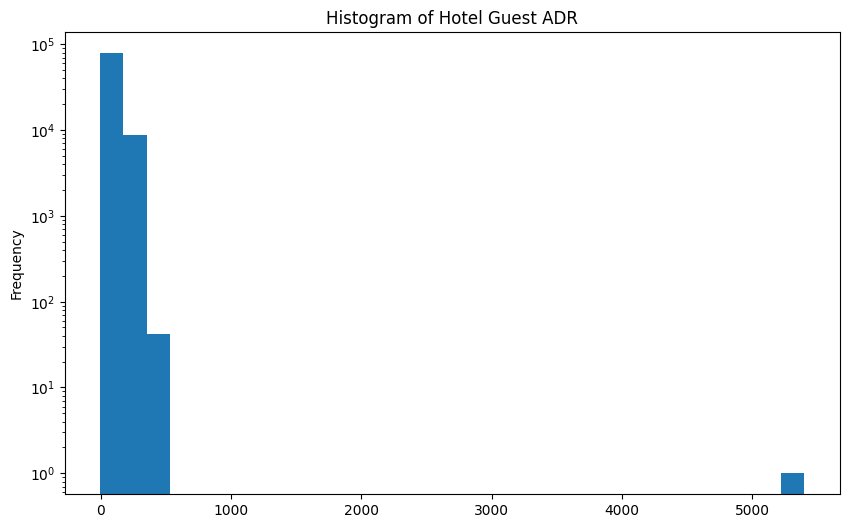

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax = data['adr'].plot(kind='hist', bins=30)

ax.set_title('Histogram of Hotel Guest ADR')
ax.set_yscale('log')

Looking into our results, we can see that there's a lone data point in the 5000 range, and it wouldn't make sense to have an `adr` that high, so we check on the raw data by sorting the values in `adr`



In [ ]:
data['adr'].sort_values(ascending=False)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
           ...   
74720        0.00
74721        0.00
1230         0.00
0            0.00
14969       -6.38
Name: adr, Length: 87300, dtype: float64

We can observe that there's one data that is very high compared to the rest. Another thing is that our lowest value is a negative number, so we remove it as well in our dataset.


In [ ]:
data = data[(data['adr'] != 5400) & (data['adr'] != -6.38)]

In [ ]:
data['adr'].sort_values(ascending=False)

111403    510.0
15083     508.0
103912    451.5
13142     450.0
13391     437.0
          ...  
32633       0.0
97751       0.0
83900       0.0
97752       0.0
0           0.0
Name: adr, Length: 87298, dtype: float64

## Data Analysis and Insights

Now that we have cleaned our data, it's time to start on our Data Analysis for this task. Keep in mind the business objective is to learn why guests cancel their hotel room reservations.

For us to explore further, we can show the context of our data through Exploratory Data Analysis (EDA)

#### the amount lost from cancelled bookings

To find out how much did the company loss from cancelled hotel bookings, we would look into the data by showing some summary statistics and a bar plot.

In [ ]:
amount_plotdata = data[data['status'] != 'No-Show']

<ipython-input-43-6a0ea93b3c32>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= amount_plotdata , x='status', y='adr',


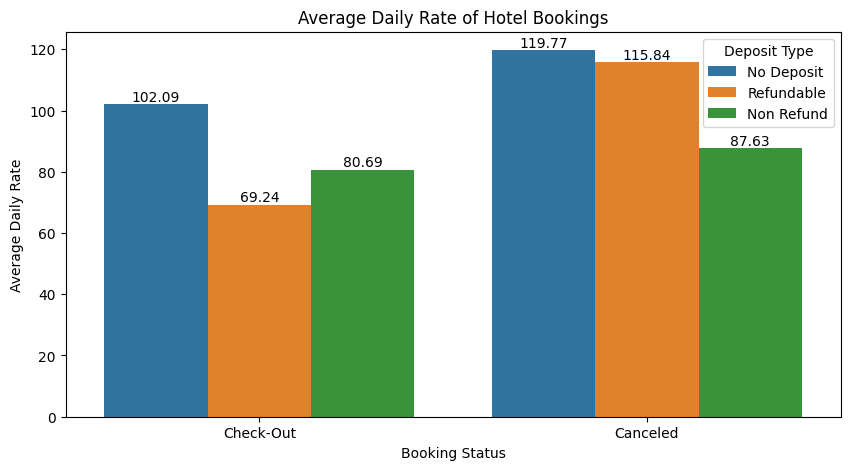

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= amount_plotdata , x='status', y='adr',
            hue='deposit_type', ci = None, ax=ax)

ax.set_title('Average Daily Rate of Hotel Bookings')
ax.set_xlabel('Booking Status')
ax.set_ylabel('Average Daily Rate')
ax.legend(title='Deposit Type')

for p in ax.patches:
    height = p.get_height()  # Get the height of the current bar
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)


Lastly, we would show the summary statistics using the column `adr` grouped by `status` and `deposit_type`.

In [ ]:
amount_plotdata.groupby(['status','deposit_type'])['adr'].describe()

count        mean        std   min   25%     50%  \
status    deposit_type                                                       
Canceled  No Deposit    21970.0  119.770062  52.301414   0.0  85.0  112.50   
          Non Refund      973.0   87.634111  33.255428   6.0  62.0   85.00   
          Refundable       25.0  115.838000  60.326292   8.0  76.0  108.36   
Check-Out No Deposit    63183.0  102.088206  51.415440   0.0  68.0   94.80   
          Non Refund       55.0   80.687818  38.075381   6.0  54.5   75.00   
          Refundable       81.0   69.239259  12.794604  34.0  66.0   66.00   

                           75%    max  
status    deposit_type                 
Canceled  No Deposit    147.00  450.0  
          Non Refund    106.00  330.0  
          Refundable    158.33  230.0  
Check-Out No Deposit    129.49  510.0  
          Non Refund    106.00  245.0  
          Refundable     72.00  128.0

#### tally the cancellations and compute the cancellation rates per day

For us to look into the cancellations further, we can plot them over time. But first, we have to supply the appropriate data before we can plot them.

In [ ]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_year'] = data['arrival_date'].dt.year

In [ ]:
data['is_canceled'] = (data['status'] == 'Canceled')

In [ ]:
grouping_cols = ['arrival_year','arrival_month','arrival_day']
canceled_data = data.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()

In [ ]:
canceled_data['cancel_rate'] = canceled_data['sum'] / canceled_data['count']

In [ ]:
# Run the given cell

canceled_data.head()

,arrival_year,arrival_month,arrival_day,sum,count,cancel_rate
0,2015,7,1,11,53,0.207547
1,2015,7,2,18,54,0.333333
2,2015,7,3,19,51,0.372549
3,2015,7,4,18,60,0.300000
4,2015,7,5,14,51,0.274510


#### line plot of hotel booking cancellation rate

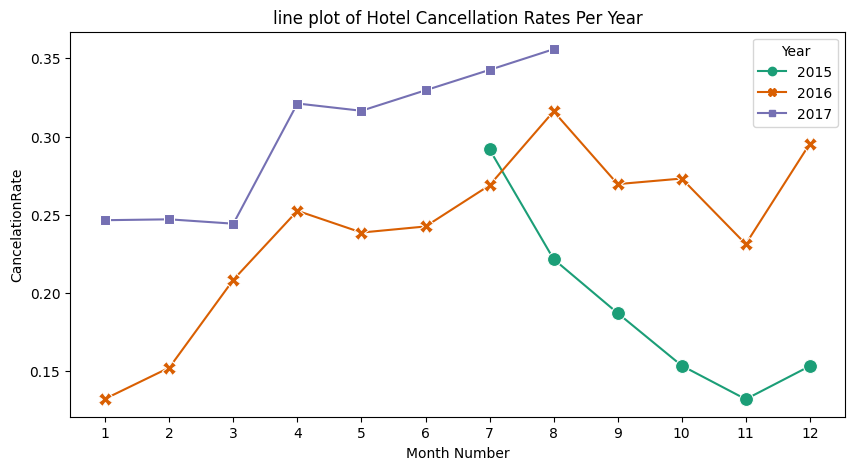

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data= canceled_data , x='arrival_month', y='cancel_rate',
             hue='arrival_year', style='arrival_year',
             markersize= 10, palette='Dark2', errorbar = None,
             markers= True, dashes= False,
             ax=ax)

ax.set_xticks(range(1,13))

ax.set_title('line plot of Hotel Cancellation Rates Per Year')
ax.set_xlabel('Month Number')
ax.set_ylabel('CancelationRate')

ax.legend(title='Year')

### tally cancellations and compute cancellation rates per deposit type and returning guest

In [ ]:
grouping_cols = ['deposit_type','is_repeated_guest','arrival_date']
pointplot_data = data.groupby(grouping_cols)['is_canceled'].agg(['sum','count']).reset_index()

In [ ]:
pointplot_data['cancel_rate'] = pointplot_data['sum'] / pointplot_data['count']

In [ ]:
pointplot_data['is_repeated_guest'] = pointplot_data['is_repeated_guest'].astype('bool')

In [ ]:
pointplot_data.head()

,deposit_type,is_repeated_guest,arrival_date,sum,count,cancel_rate
0,No Deposit,False,2015-07-01,11,52,0.211538
1,No Deposit,False,2015-07-02,15,51,0.294118
2,No Deposit,False,2015-07-03,19,51,0.372549
3,No Deposit,False,2015-07-04,17,59,0.288136
4,No Deposit,False,2015-07-05,13,50,0.260000


#### Pointplot of Cancellation Rates by Deposit Type

In [ ]:
data['is_repeated_guest']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 87298, dtype: int64

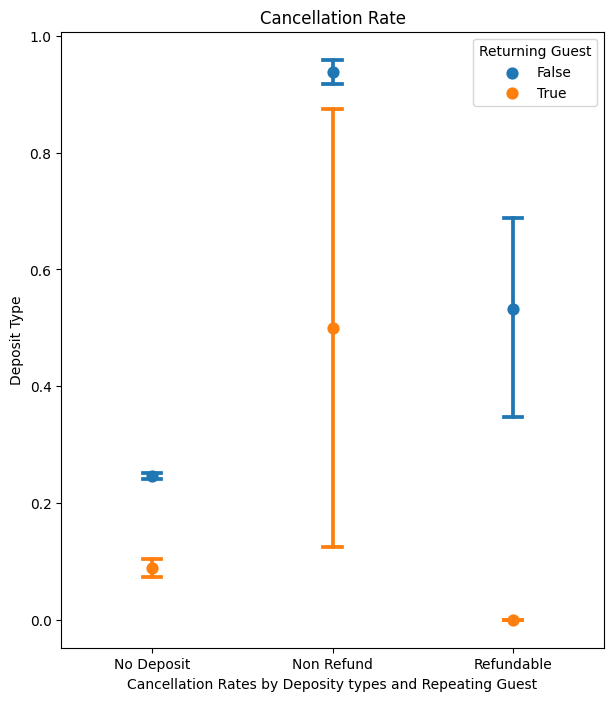

In [ ]:
fig, ax = plt.subplots(figsize=(7,8))
sns.pointplot(data=pointplot_data, x='deposit_type', y='cancel_rate',
              hue='is_repeated_guest', join= False,
              capsize= .1, ax=ax)

ax.set_xlabel('Cancellation Rates by Deposity types and Repeating Guest')
ax.set_ylabel('Deposit Type')
ax.set_title('Cancellation Rate')
ax.legend(title='Returning Guest')


### Other Analysis and Insights

#### Solo/Couple guest vs. Family guest cancellation rates

In [ ]:
# new column to categorize guests as "Solo/Couple" or "Family" based on the number of adults, children, and babies.

def categorize_guest(row):
    if row['adults'] == 1 and row['children'] == 0 and row['babies'] == 0:
        return 'Solo'
    elif row['adults'] == 2 or (row['adults'] == 1 and (row['children'] == 1 or row['babies'] == 1)):
        return 'Couple'
    else:
        return 'Family'

data['guest_category'] = data.apply(categorize_guest, axis=1)

In [ ]:
cancellation_rates = data.groupby('guest_category')['status'].value_counts(normalize=True).unstack()
print(cancellation_rates)

status          Canceled  Check-Out   No-Show
guest_category                               
Couple          0.279104   0.711070  0.009826
Family          0.327686   0.663919  0.008394
Solo            0.172024   0.808002  0.019974


<Figure size 1000x600 with 0 Axes>

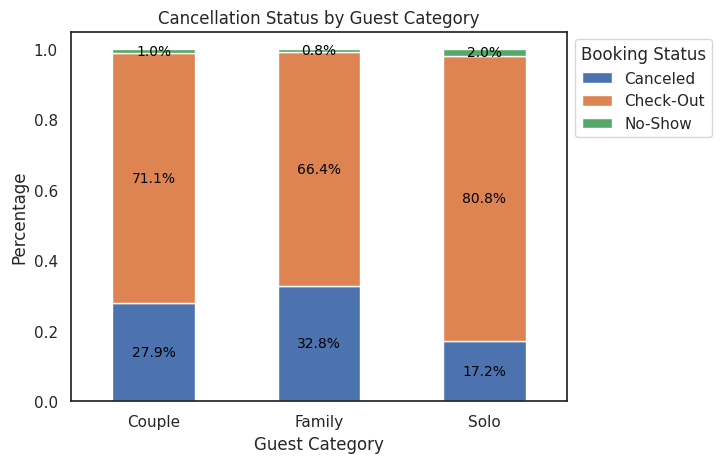

In [ ]:
# Set the style of the plot
sns.set(style="white")

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
ax = cancellation_rates.plot(kind='bar', stacked=True)

# Display percentages at the center of each segment
totals = []
for p in ax.patches:
    totals.append(p.get_height())

total = sum(totals)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Cancellation Status by Guest Category')
plt.xlabel('Guest Category')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Booking Status', bbox_to_anchor=(1, 1), loc='upper left')
plt.gca().yaxis.grid(False)  # Turn off y-axis grid lines
plt.show()

## Hypothesis Testing

In [ ]:
pip install scipy

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

In [ ]:
# Separate ADR values for each hotel
adr_hotel_1 = data[data['hotel'] == 'Resort Hotel']['adr']
adr_hotel_2 = data[data['hotel'] == 'City Hotel']['adr']

# Perform the unpaired t-test
t_statistic, p_value = ttest_ind(adr_hotel_1, adr_hotel_2)

# Print the results
print("Unpaired Two-Sample t-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine significance level
alpha = 0.05

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Null hypothesis rejected: There is a statistically significant difference in ADR between the two hotels.")
else:
    print("Null hypothesis not rejected: There is no statistically significant difference in ADR between the two hotels.")


Unpaired Two-Sample t-Test Results:
T-Statistic: -32.95232584185899
P-Value: 1.1224758056372392e-236
Null hypothesis rejected: There is a statistically significant difference in ADR between the two hotels.


## RFM

In [ ]:

# Calculate the current date for recency calculation
current_date = data['arrival_date'].max()

# Calculate Recency, Frequency, and Monetary values for each customer
rfm_data = data.groupby('country').agg({
    'arrival_date': lambda x: (current_date - x.max()).days,
    'hotel': 'count',
    'adr': 'sum'
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['country', 'recency', 'frequency', 'monetary']

sorted_rfm_data = rfm_data.sort_values(by='monetary')
print(sorted_rfm_data)

    country  recency  frequency    monetary
40      CYM      679          1       40.50
105     MDG      235          1       44.00
14      BDI      478          1       46.00
21      BHS      124          1       50.85
8       ASM      218          1       72.07
..      ...      ...        ...         ...
43      DEU        0       5381   570090.94
51      ESP        0       7250   886619.74
56      FRA        0       8835   994310.11
59      GBR        0      10427  1018408.20
136     PRT        0      27385  2620996.91

[178 rows x 4 columns]


In [ ]:
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])
quantiles

<ipython-input-64-4abc90115dd6>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])


,recency,frequency,monetary
0.25,6.0,2.00,264.4375
0.50,34.0,11.00,1402.6250
0.75,122.5,67.25,7580.4800


In [ ]:
# create a dictionary with the recency quantiles
recency_dict = quantiles['recency'].to_dict()
frequency_dict = quantiles['frequency'].to_dict()
monetary_dict = quantiles['monetary'].to_dict()

In [ ]:
# create a function to calculate recency score
def recency_score(recency, recency_dict):
    if recency <= recency_dict[0.25]:
        # recency_score = 1 if recency is between 0-0.25 quantile
        return '1'
    elif recency <= recency_dict[0.5]:
        # recency_score = 2 if recency is between 0.25-0.5 quantile
        return '2'
    elif recency <= recency_dict[0.75]:
        # recency_score = 3 if recency is between 0.5-0.75 quantile
        return '3'
    else:
        # recency_score = 4 if recency is between 0.75-1 quantile
        return '4'

rfm_data['recency_score'] = rfm_data['recency'].apply(recency_score, args=(recency_dict,))

# create a function to calculate frequency score
def frequency_score(frequency, frequency_dict):
    if frequency <= frequency_dict[0.25]:
        # frequency_score = 4 if frequency is between 0-0.25 quantile
        return '4'
    elif frequency <= frequency_dict[0.5]:
        # frequency_score = 3 if frequency is between 0.25-0.5 quantile
        return '3'
    elif frequency <= frequency_dict[0.75]:
        # frequency_score = 2 if frequency is between 0.5-0.75 quantile
        return '2'
    else:
        # frequency_score = 1 if frequency is between 0.75-1 quantile
        return '1'

rfm_data['frequency_score'] = rfm_data['frequency'].apply(frequency_score, args=(frequency_dict,))

# create a function to calculate monetary score
def monetary_score(monetary, monetary_dict):
    if monetary <= monetary_dict[0.25]:
        # monetary_score = 4 if monetary is between 0-0.25 quantile
        return '4'
    elif monetary <= monetary_dict[0.5]:
        # monetary_score = 3 if monetary is between 0.25-0.5 quantile
        return '3'
    elif monetary <= monetary_dict[0.75]:
        # monetary_score = 2 if monetary is between 0.5-0.75 quantile
        return '2'
    else:
        # monetary_score = 1 if monetary is between 0.75-1 quantile
        return '1'

rfm_data['monetary_score'] = rfm_data['monetary'].apply(monetary_score, args=(monetary_dict,))

In [ ]:
#concatenate the rfm scores
rfm_data['rfm_score'] = rfm_data['recency_score'] + rfm_data['frequency_score'] + rfm_data['monetary_score']

In [ ]:
segment_counts = {
    'High Value and Frequency': len(rfm_data[rfm_data['rfm_score'] == '111']),
    'Loyal but Lower Value': len(rfm_data[rfm_data['frequency_score'] == '1']),
    'High Value but Lower Frequency': len(rfm_data[rfm_data['monetary_score'] == '1']),
    'Potential to Re-Engage': len(rfm_data[rfm_data['rfm_score'] == '311']),
    'Dormant but Valuable': len(rfm_data[rfm_data['rfm_score'] == '411']),
    'Least Engaged': len(rfm_data[rfm_data['rfm_score'] == '444'])}

In [ ]:
df_counts = pd.DataFrame(segment_counts.values(), index=segment_counts.keys(), columns=['counts'])
df_counts

,counts
High Value and Frequency,34
Loyal but Lower Value,45
High Value but Lower Frequency,45
Potential to Re-Engage,0
Dormant but Valuable,1
Least Engaged,30


Text(0, 0.5, '# Country per Segment')

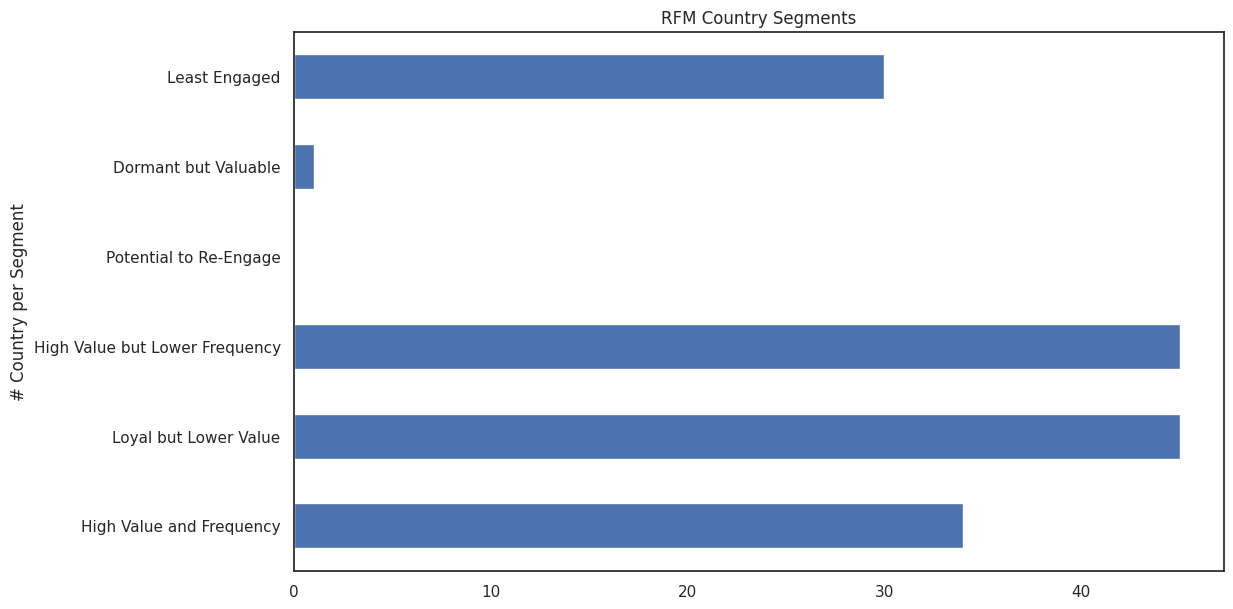

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
df_counts.plot(kind='barh', ax=ax, legend=False)
ax.set_title('RFM Country Segments')
ax.set_ylabel('# Country per Segment')

In [ ]:
#top Cuntries
rfm_data[rfm_data['rfm_score']=='111'].sort_values('monetary', ascending=False).head(10)

,country,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
136,PRT,0,27385,2620996.91,1,1,1,111
59,GBR,0,10427,1018408.20,1,1,1,111
56,FRA,0,8835,994310.11,1,1,1,111
51,ESP,0,7250,886619.74,1,1,1,111
43,DEU,0,5381,570090.94,1,1,1,111
81,ITA,0,3065,355773.28,1,1,1,111
76,IRL,0,3015,303102.22,1,1,1,111
15,BEL,1,2081,240104.09,1,1,1,111
170,USA,0,1875,235615.49,1,1,1,111
25,BRA,0,1993,224675.24,1,1,1,111


##Comparison of guest category on who cancel more bookings

In [ ]:
# Separate data for resort and city hotels
resort_data = data[data['hotel'] == 'Resort Hotel']
city_data = data[data['hotel'] == 'City Hotel']

def calculate_cancellation_rate(data, status_column):
    total_bookings = data.shape[0]
    cancellations = (data[status_column] == 'Canceled').sum()
    return cancellations / total_bookings

guest_categories = data['guest_category'].unique()
status_column = 'status'

In [ ]:
cancellation_rates_resort = [calculate_cancellation_rate(resort_data[resort_data['guest_category'] == guest_category], status_column) for guest_category in guest_categories]
cancellation_rates_city = [calculate_cancellation_rate(city_data[city_data['guest_category'] == guest_category], status_column) for guest_category in guest_categories]
cancellation_rates_total = [calculate_cancellation_rate(data[data['guest_category'] == guest_category], status_column) for guest_category in guest_categories]

In [ ]:
# Calculate total cancellations for resort and city hotels
total_cancellations_resort = resort_data[status_column].value_counts().get('Canceled', 0)
total_cancellations_city = city_data[status_column].value_counts().get('Canceled', 0)

In [ ]:
total_cancellations_city, total_cancellations_resort

(15278, 7690)

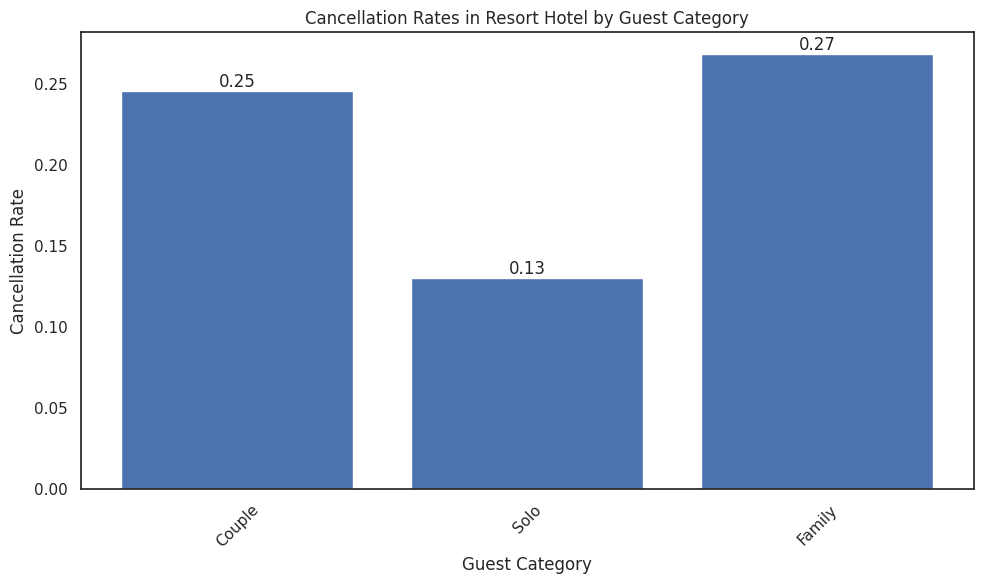

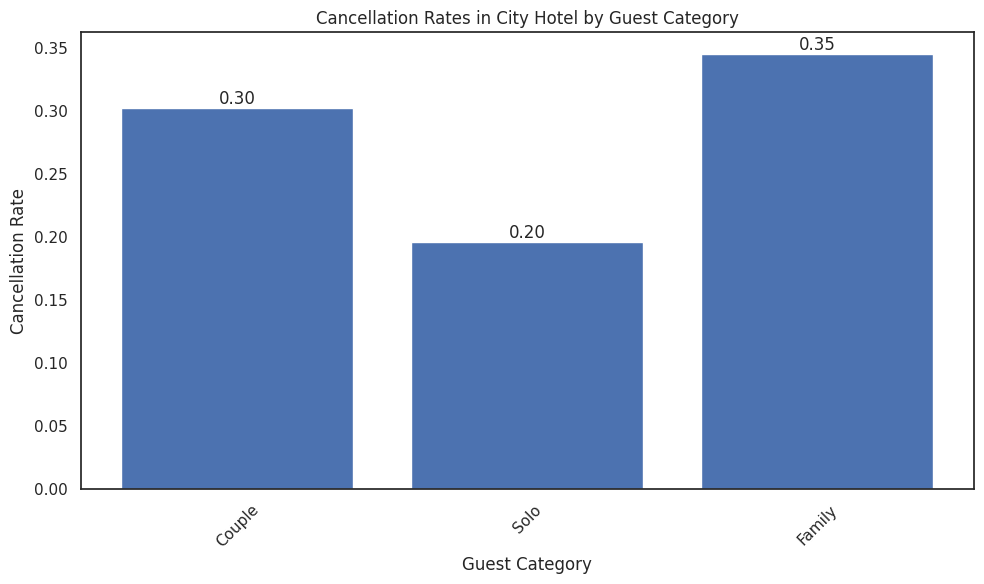

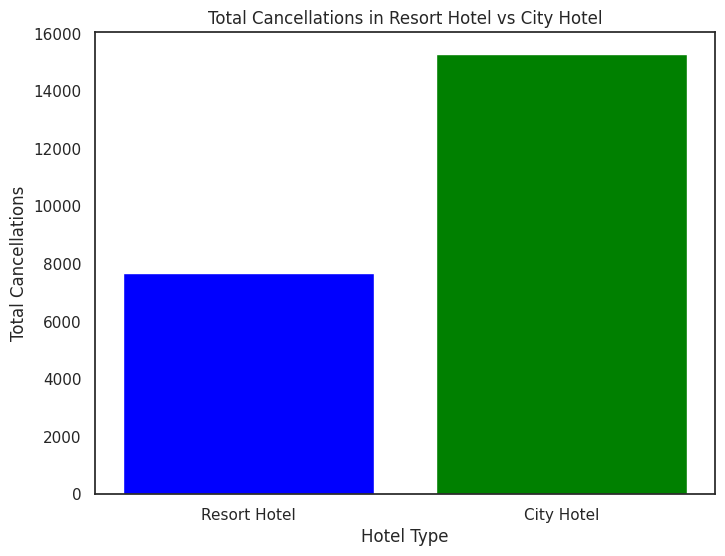

In [ ]:
# Bar chart for cancellation rates in the resort hotel
plt.figure(figsize=(10, 6))
bars = plt.bar(guest_categories, cancellation_rates_resort)
plt.xlabel('Guest Category')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates in Resort Hotel by Guest Category')
plt.xticks(rotation=45)

# Adding values on top of the bars
for bar, rate in zip(bars, cancellation_rates_resort):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Bar chart for cancellation rates in the city hotel
plt.figure(figsize=(10, 6))
bars = plt.bar(guest_categories, cancellation_rates_city)
plt.xlabel('Guest Category')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates in City Hotel by Guest Category')
plt.xticks(rotation=45)

# Adding values on top of the bars
for bar, rate in zip(bars, cancellation_rates_city):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{rate:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#bar chart for comparing who has more booking cancellation
hotel_types = ['Resort Hotel', 'City Hotel']
total_cancellations = [total_cancellations_resort, total_cancellations_city]

plt.figure(figsize=(8, 6))
plt.bar(hotel_types, total_cancellations, color=['blue', 'green'])
plt.xlabel('Hotel Type')
plt.ylabel('Total Cancellations')
plt.title('Total Cancellations in Resort Hotel vs City Hotel')
plt.show()

## Conclusions and Recommendations


The decline of booking cancellation starts before/at bermonths,
Family Guests has the highest rate of booking cancellation and close to it is the couple guests, City Hotel(15278 cancelled) has more cancellations than Resort Hotel(7690 cancelled). I highly recommend to improve the hotels to be compatible to Family Guests and Couples, explain the policy clearly and properly to the customer so they can understand if they didn't have their refund, its important to protect the rating of the Hotel so many customers may come.

---

**END OF FILE**